In [1]:
!pip install lda
!pip install pymysql # mysql database connection library
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

import numpy as np
import lda
import lda.datasets
import numpy as np
import pandas as pd             # Querying results to make dataframe(to divide datas)
import pymysql.cursors          # For Request Query String
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

     |████████████████████████████████| 351 kB 7.9 MB/s 
     |████████████████████████████████| 99 kB 4.7 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-notebook", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/notebook/notebookapp.py", line 1507, in initialize
    self.init_webapp()
  File "/usr/local/lib/python3.7/dist-packages/notebook/notebookapp.py", line 1297, in init_webapp
    self.http_server.listen(port, self.ip)

In [22]:
conn = pymysql.connect(host='csrd.cksngv0eixsu.ap-northeast-2.rds.amazonaws.com', port=3306, user='admin', password='qwerty1!', \
db='before-pp', charset='utf8', autocommit=True, cursorclass=pymysql.cursors.DictCursor)        # mysql connect inform
sql = "SELECT * FROM `before-pp`.bf_pl order by pl_id desc;"
cur = conn.cursor() # open to query
cur.execute(sql)    # excute query
result = cur.fetchall() # merging result
conn.close()    # DB disconnect
df = pd.DataFrame(result)   # 전체 음악리스트 확인(playlist_id 기준이기 때문에 중복값 들어있음)
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)  # 중복 처리
# ext_lists = df.values.tolist() # pytube에서 검색어로 사용하기 위한 리스트 변환

In [ ]:
import re
import matplotlib.pyplot as plt


In [35]:
df['result'] = df['pl_name'] + " " + df['pl_intro']
df

,pl_id,pl_name,pl_intro,pl_like,inserted_cnt,result
0,10656,듣는순간 흥폭발 신나고 중독성 있는 K-POP,케이팝이 끌리는날! 100곡의 신나고 중독성있는 케이팝 들어봐요,4,0,듣는순간 흥폭발 신나고 중독성 있는 K-POP 케이팝이 끌리는날! 100곡의 신나고...
1,10631,임창정이 추천하는 시대와 장르를 초월하는 음악,저는 시대와 장르를 초월하는 다양한 종류의 음악을 좋아합니다.저에게 음악적으로 영향...,279,1,임창정이 추천하는 시대와 장르를 초월하는 음악 저는 시대와 장르를 초월하는 다양한 ...
2,10629,[일상의 BGM] 감각적인 비트와 멜로디,2019.11.2비트감 있고 세련된 멜로디의 재즈힙합 곡 위주로 모아봤어요.루즈하지...,665,1,[일상의 BGM] 감각적인 비트와 멜로디 2019.11.2비트감 있고 세련된 멜로...
3,10627,크리에이티브 영감을 자극하는 선율의 연주곡,"집중이 필요할 때, 창의적인 작업 중일 때, 업무 효율을 늘리고 싶을 때 들어보세요...",153,1,"크리에이티브 영감을 자극하는 선율의 연주곡 집중이 필요할 때, 창의적인 작업 중일 ..."
4,10626,작업할 때 듣기 좋은 잔잔한 POP,당신의 작업을 응원합니다.,12,1,작업할 때 듣기 좋은 잔잔한 POP 당신의 작업을 응원합니다.
...,...,...,...,...,...,...
5510,5,주말의 여유를 느끼고 싶을때 들으면 좋은 곡들,,11,0,주말의 여유를 느끼고 싶을때 들으면 좋은 곡들
5511,4,늦은 밤에 혼자 듣기 좋은 발라드 노래,늦은 밤 혼자 듣기 좋은 발라드 노래,6454,0,늦은 밤에 혼자 듣기 좋은 발라드 노래 늦은 밤 혼자 듣기 좋은 발라드 노래
5512,3,싸이월드 bgm 인기곡차트를 휩쓴 추억의 노래들 (,,2969,2,싸이월드 bgm 인기곡차트를 휩쓴 추억의 노래들 (
5513,2,펑펑 울고 싶은 날 들어요. 이별을 노래한 잔잔한 발라드,,2322,0,펑펑 울고 싶은 날 들어요. 이별을 노래한 잔잔한 발라드


In [39]:
df_test = list(df.result.astype("str")) # 텍스트 부분을 리스트로 만든 후 저장, 리스트에 저장 하기 전 가끔씩 문자열로 인식 하지 않는 오류가 있음
# 추후에 게시글 단위로 문서를 나누고 해당 문서의 의미를 찾아내기 위해 리스트로 분리해서 나눠줘야 하기 때문.

df_test

['듣는순간 흥폭발 신나고 중독성 있는 K-POP 케이팝이 끌리는날! 100곡의 신나고 중독성있는 케이팝 들어봐요',
 '임창정이 추천하는 시대와 장르를 초월하는 음악 저는 시대와 장르를 초월하는 다양한 종류의 음악을 좋아합니다.저에게 음악적으로 영향을 준 좋아하는 멜로디 라인들의 곡을 공유하고 싶어요.제가 따라하고 싶은 음악들을 함께 감상해주세요.',
 '[일상의 BGM] 감각적인 비트와 멜로디  2019.11.2비트감 있고 세련된 멜로디의 재즈힙합 곡 위주로 모아봤어요.루즈하지않고 들으면 들을수록 묘하게 끌리는 멜로디입니다 :)일상을 소중하고 특별하게 !음악 듣고 행복한 하루가 되셨음 해요 :)',
 '크리에이티브 영감을 자극하는 선율의 연주곡 집중이 필요할 때, 창의적인 작업 중일 때, 업무 효율을 늘리고 싶을 때 들어보세요. 집중력을 높여줘서 작업도 업무도 빨리 마무리하실 수 있을 거예요. 공부할 때, 휴식이 필요할 때도 좋아요. 적게 일하고 많이 버세요.',
 '작업할 때 듣기 좋은 잔잔한 POP 당신의 작업을 응원합니다.',
 '나얼&에코브릿지의 추천 플리! [Sympathy(공감)] 나얼&에코브릿지의 Diggin On Air 4화 [Sympathy(공감)]나얼이 생각하는 퀸시존스의 8090 명반과 에코브릿지가 추천해주는 연주자 입장에서 영감을 받은 곡들까지! 매주 토요일 오후 7시! 음잘알이 추천해주는 플레이리스트를 멜론 스테이션에서 만나보세요. ',
 "빌리 아일리시가 한국 팬들과 함께 듣고 싶은 요즘 최애곡 빌리 아일리시가 두 번째 정규 앨범 'Happier Than Ever'의 '발매를 기념하기 위해 한국 팬들과 함께 공유하고 싶은 플레이리스트를 보내왔습니다 :) 빌리 아일리시가 요즘 듣는 최애곡이라고 하는 만큼, 이번 앨범의 이미지와 사운드에 영향을 준 듯한 노래들도 보이네요.때로는 차분한 칠링 감성, 때로는 강렬하고 독특한 사운드로 영감을 자극하는 빌리 아일리시의 요즘 최애곡 플레이리스트 꼭 한 번 들어보세요.",
 '우리에게 영감을 주는

In [76]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in df_test:
    clean = strip_punctuation(sent)
    clean_title.append(clean)

In [77]:
len(clean_title), clean_title

(5515,
 ['듣는순간 흥폭발 신나고 중독성 있는 KPOP 케이팝이 끌리는날 100곡의 신나고 중독성있는 케이팝 들어봐요',
  '임창정이 추천하는 시대와 장르를 초월하는 음악 저는 시대와 장르를 초월하는 다양한 종류의 음악을 좋아합니다저에게 음악적으로 영향을 준 좋아하는 멜로디 라인들의 곡을 공유하고 싶어요제가 따라하고 싶은 음악들을 함께 감상해주세요',
  '일상의 BGM 감각적인 비트와 멜로디  2019112비트감 있고 세련된 멜로디의 재즈힙합 곡 위주로 모아봤어요루즈하지않고 들으면 들을수록 묘하게 끌리는 멜로디입니다 일상을 소중하고 특별하게 음악 듣고 행복한 하루가 되셨음 해요 ',
  '크리에이티브 영감을 자극하는 선율의 연주곡 집중이 필요할 때 창의적인 작업 중일 때 업무 효율을 늘리고 싶을 때 들어보세요 집중력을 높여줘서 작업도 업무도 빨리 마무리하실 수 있을 거예요 공부할 때 휴식이 필요할 때도 좋아요 적게 일하고 많이 버세요',
  '작업할 때 듣기 좋은 잔잔한 POP 당신의 작업을 응원합니다',
  '나얼에코브릿지의 추천 플리 Sympathy공감 나얼에코브릿지의 Diggin On Air 4화 Sympathy공감나얼이 생각하는 퀸시존스의 8090 명반과 에코브릿지가 추천해주는 연주자 입장에서 영감을 받은 곡들까지 매주 토요일 오후 7시 음잘알이 추천해주는 플레이리스트를 멜론 스테이션에서 만나보세요 ',
  '빌리 아일리시가 한국 팬들과 함께 듣고 싶은 요즘 최애곡 빌리 아일리시가 두 번째 정규 앨범 Happier Than Ever의 발매를 기념하기 위해 한국 팬들과 함께 공유하고 싶은 플레이리스트를 보내왔습니다  빌리 아일리시가 요즘 듣는 최애곡이라고 하는 만큼 이번 앨범의 이미지와 사운드에 영향을 준 듯한 노래들도 보이네요때로는 차분한 칠링 감성 때로는 강렬하고 독특한 사운드로 영감을 자극하는 빌리 아일리시의 요즘 최애곡 플레이리스트 꼭 한 번 들어보세요',
  '우리에게 영감을 주는 신선한 ',
  '작업하면서 틀어놓기 좋은 BGM  취

In [46]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 448 kB 48.4 MB/s 


In [70]:
from konlpy.tag import Kkma
kkma = Kkma()

In [71]:
import time
import datetime
import re
start = time.time()     # 수행 시간 알기 위한 time 사용

In [119]:
def cleanText(readData):    #텍스트에 포함되어 있는 특수 문자 제거 
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', readData) 
    return text

cleantext = list()
for i in clean_title:
    ret = re.sub(r"[^가-힣a-zA-Z0-9]"," ",i).lstrip().rstrip()
    cleantext.append(ret)
cleantext

['듣는순간 흥폭발 신나고 중독성 있는 KPOP 케이팝이 끌리는날 100곡의 신나고 중독성있는 케이팝 들어봐요',
 '임창정이 추천하는 시대와 장르를 초월하는 음악 저는 시대와 장르를 초월하는 다양한 종류의 음악을 좋아합니다저에게 음악적으로 영향을 준 좋아하는 멜로디 라인들의 곡을 공유하고 싶어요제가 따라하고 싶은 음악들을 함께 감상해주세요',
 '일상의 BGM 감각적인 비트와 멜로디  2019112비트감 있고 세련된 멜로디의 재즈힙합 곡 위주로 모아봤어요루즈하지않고 들으면 들을수록 묘하게 끌리는 멜로디입니다 일상을 소중하고 특별하게 음악 듣고 행복한 하루가 되셨음 해요',
 '크리에이티브 영감을 자극하는 선율의 연주곡 집중이 필요할 때 창의적인 작업 중일 때 업무 효율을 늘리고 싶을 때 들어보세요 집중력을 높여줘서 작업도 업무도 빨리 마무리하실 수 있을 거예요 공부할 때 휴식이 필요할 때도 좋아요 적게 일하고 많이 버세요',
 '작업할 때 듣기 좋은 잔잔한 POP 당신의 작업을 응원합니다',
 '나얼에코브릿지의 추천 플리 Sympathy공감 나얼에코브릿지의 Diggin On Air 4화 Sympathy공감나얼이 생각하는 퀸시존스의 8090 명반과 에코브릿지가 추천해주는 연주자 입장에서 영감을 받은 곡들까지 매주 토요일 오후 7시 음잘알이 추천해주는 플레이리스트를 멜론 스테이션에서 만나보세요',
 '빌리 아일리시가 한국 팬들과 함께 듣고 싶은 요즘 최애곡 빌리 아일리시가 두 번째 정규 앨범 Happier Than Ever의 발매를 기념하기 위해 한국 팬들과 함께 공유하고 싶은 플레이리스트를 보내왔습니다  빌리 아일리시가 요즘 듣는 최애곡이라고 하는 만큼 이번 앨범의 이미지와 사운드에 영향을 준 듯한 노래들도 보이네요때로는 차분한 칠링 감성 때로는 강렬하고 독특한 사운드로 영감을 자극하는 빌리 아일리시의 요즘 최애곡 플레이리스트 꼭 한 번 들어보세요',
 '우리에게 영감을 주는 신선한',
 '작업하면서 틀어놓기 좋은 BGM  취미활동작업할때 BGM으로 틀어놓기 

In [98]:
# ## 한글 알파벳 외에 공백
# dataset = []
# for i in range(len(cleantext)):
#     dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s', '', cleantext[i])))

# sec = time.time()-start
# times = str(datetime.timedelta(seconds=sec)).split(".")
# times = times[0]
# print(times)

error: ignored

In [122]:
clean_title2 = []
clean_title3 = []
clean_title4 = []
clean_title5 = []
clean_title6 = []
clean_title7 = []
clean_title8 = []
clean_title9 = []
clean_title10 = []

for i in range(len(cleantext)):
    clean_title2.append(re.sub('음악', ' ', cleantext[i]))
    

for i in range(len(clean_title2)):
    clean_title3.append(re.sub('리스트', ' ', clean_title2[i]))


for i in range(len(clean_title3)):
    clean_title4.append(re.sub('플레이리스트', ' ', clean_title3[i]))


for i in range(len(clean_title4)):
    clean_title5.append(re.sub('플레이', ' ', clean_title4[i]))


for i in range(len(clean_title5)):
    clean_title6.append(re.sub('모음', ' ', clean_title5[i]))


for i in range(len(clean_title6)):
    clean_title7.append(re.sub('노래', ' ', clean_title6[i]))


for i in range(len(clean_title7)):
    clean_title8.append(re.sub('오늘', ' ', clean_title7[i]))


for i in range(len(clean_title8)):
    clean_title9.append(re.sub('우리', ' ', clean_title8[i]))


for i in range(len(clean_title9)):
    clean_title10.append(re.sub('우리', ' ', clean_title9[i]))

In [123]:
## 한글 알파벳 외에 공백
mkdatasets = clean_title10
dataset = []
for i in range(len(mkdatasets)):
    dataset.append(kkma.nouns(mkdatasets[i]))

sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

2:26:59


In [124]:
dataset

[['순간', '흥', '흥폭발', '폭발', '중독성', '케이', '케이팝', '팝', '날', '100', '100곡', '곡'],
 ['임',
  '임창정',
  '창정',
  '추천',
  '시대',
  '장르',
  '초월',
  '저',
  '다양',
  '종류',
  '종류의',
  '의',
  '을',
  '적',
  '영향',
  '멜로디',
  '라인',
  '곡',
  '공유',
  '들',
  '감상'],
 ['일상',
  '감각적',
  '비트',
  '멜로디',
  '2019112',
  '2019112비트감',
  '감',
  '세련',
  '재즈',
  '재즈힙합',
  '힙합',
  '곡',
  '위주',
  '루즈',
  '특별',
  '행복',
  '하루'],
 ['크리',
  '티브',
  '영감',
  '자극',
  '선율',
  '연주곡',
  '집중',
  '필요',
  '때',
  '창',
  '적인',
  '작업',
  '중',
  '업무',
  '효율',
  '보세',
  '집중력',
  '마무리',
  '수',
  '거',
  '공부',
  '휴식',
  '버세'],
 ['작업', '때', '당신', '응원'],
 ['나',
  '얼',
  '코',
  '코브릿지의',
  '브릿',
  '지의',
  '추천',
  '플',
  '플리',
  '리',
  '공감',
  '나얼에코브릿지',
  '4',
  '생각',
  '퀸',
  '퀸시존스',
  '시',
  '존스',
  '8090',
  '명',
  '명반',
  '반',
  '에코',
  '에코브릿지가',
  '지가',
  '연주자',
  '입장',
  '영감',
  '곡',
  '토요일',
  '오후',
  '7',
  '7시',
  '시',
  '음',
  '알',
  '를',
  '멜론',
  '스테이션'],
 ['리',
  '일리',
  '일리시가',
  '시가',
  '한국',
  '팬',
  '요즘',
  '최',
  '최애곡',
  '애곡',


In [106]:
!pip install gensim
from gensim import corpora, models
import gensim

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


In [125]:
high_score_reviews = dataset

In [126]:
high_score_reviews = [[y for y in x if not len(y) == 1]
                      for x in high_score_reviews]

dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(10774 unique tokens: ['100', '100곡', '순간', '중독성', '케이']...) from 5515 documents (total 41730 corpus positions)


#### CoherenceModel 을 통한 토픽 최적화

* 의미 : 토픽이 얼마나 의미론적으로 일관성 있는지 판단. 높을수록 의미론적 일관성 높음
<p>

<p>
 
<p>

<p>

* 주 용도 : 해당 모델이 얼마나 실제로 의미 있는 결과를 내는지 확인
<p>
<p>
    기존에 언어모델 평가로 CoherenceModel만을 사용 후
<p>
<p>
    원하는 토픽 개수의 Coherence 모델을 지속 학습 시켜 토픽을 할당 했으나

In [127]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 0.5
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 5515 documents, updating model once every 2000 documents, evaluating perplexity every 5515 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/5515
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 5515 documents
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.009*"감성" + 0.007*"사랑" + 0.006*"크리스마스" + 0.006*"기분" + 0.005*"분위기" + 0.005*"마음" + 0.005*"추천" + 0.005*"겨울" + 0.004*"캐롤" + 0.004*"행복"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.019*"크리스마스" + 0.008*"캐롤" + 0.008*"분위기" + 0.008*"겨울" + 0.006*"추천" + 0.006*"국내" + 0.005*"마음" + 0.005*"힙합" + 0.005*"아이" + 0.005*"팝송"
INFO:gensim.models.ldamodel

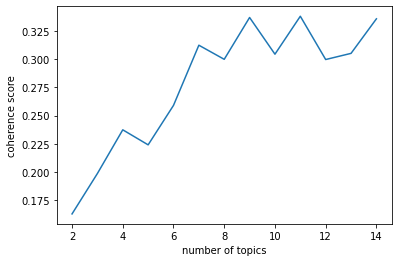

In [128]:
x = range(2, 15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

#### 언어 모델 평가 방법

* 퍼플렉서티(perplexity) : PPL로 줄여서 표현
* perplexed : 헷갈리는‘ 과 유사한 의미
* 선정된 토픽 개수마다 학습시켜 가장 낮은 값을 보이는 구간을 찾아 최적화된 토픽의 개수 선정 가능

<p>

<p>

* 의미 : 확률 모델이 결과를 얼마나 정확하게 예측하는지 판단.낮을수록 정확하게 예측.

<p>

<p>

* 주 용도 : 동일 모델 내 파라미터에 따른 성능 평가할 때 주로 사용.

<p>

<p>

* 한계 : Perplexity가 낮다고 해서, 결과가 해석 용이하다는 의미가 아님

In [129]:
perplexity_values = []
for i in range(2, 20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 0.5
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 5515 documents, updating model once every 2000 documents, evaluating perplexity every 5515 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/5515
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 5515 documents
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.008*"겨울" + 0.007*"추천" + 0.006*"감성" + 0.006*"캐롤" + 0.006*"크리스마스" + 0.005*"분위기" + 0.005*"힙합" + 0.005*"기분" + 0.004*"사랑" + 0.004*"재즈"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.019*"크리스마스" + 0.008*"분위기" + 0.007*"감성" + 0.007*"캐롤" + 0.006*"마음" + 0.006*"사랑" + 0.005*"아이" + 0.005*"추천" + 0.005*"느낌" + 0.005*"겨울"
INFO:gensim.models.ldamodel

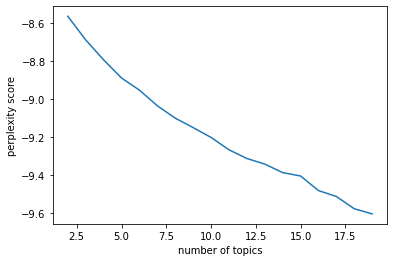

In [130]:
x = range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

### 하이퍼 파라미터 선정 및 LDA 시각화

1. 학습된 코퍼스(말뭉치)로 토픽 개수를 선정하고 alpha, eta, iterations, cunk_size등 다양한 파라미터 적용 가능.

2. pyLDAvis를 불러온 뒤 학습된 모델 시각화 진행
파라미터의 조정에 있어서 크게 alpha,beta 값을 조정하게 되는데,
이에 따라 토픽 내 분포하는 문서, 단어의 분포가 달라짐.

3. 내가 원하는 주제들을 설명할 수 있는 단어들을 끌어 내기 위해
파라미터 값을 설정하기도 하므로 해당 단어들의 이해도나
문서에 담긴 도메인 이해도가 중요

* 추가로 해당 토픽에 묶인 단어들이 사용자 사전에 정의되지 않았다면
사용자 사전을 추가하여 단어를 등록하는 과정도 필요

In [131]:
# 위 결과 기반으로 토픽 개수 수정
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=18, alpha=0.1, id2word=dictionary)

INFO:gensim.models.ldamodel:using symmetric eta at 0.05555555555555555
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 18 topics, 1 passes over the supplied corpus of 5515 documents, updating model once every 2000 documents, evaluating perplexity every 5515 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/5515
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 5515 documents
INFO:gensim.models.ldamodel:topic #10 (0.100): 0.014*"팝송" + 0.013*"크리스마스" + 0.010*"캐롤" + 0.008*"재즈" + 0.008*"분위기" + 0.008*"카페" + 0.007*"기분" + 0.007*"감성" + 0.007*"겨울" + 0.006*"하세"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.016*"기분" + 0.012*"추천" + 0.009*"하이픈" + 0.009*"엔하이픈" + 0.008*"힙합" + 0.008*"텐션" + 0.007*"날씨" + 0.005*"아침" + 0.005*"운동" + 0.005*"기분전환"
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.006*"분위기" + 0.006

In [132]:
ldamodel.print_topics(num_words=20)

INFO:gensim.models.ldamodel:topic #0 (0.100): 0.018*"피아노" + 0.017*"연주곡" + 0.016*"에이지" + 0.016*"뉴에이지" + 0.009*"편안" + 0.008*"분위기" + 0.008*"기분" + 0.007*"마음" + 0.006*"나의" + 0.006*"감성" + 0.006*"클래식" + 0.006*"파티" + 0.006*"여름" + 0.006*"댄스곡" + 0.006*"고막" + 0.005*"댄스" + 0.005*"팝송" + 0.005*"장면" + 0.005*"베이스" + 0.005*"일렉"
INFO:gensim.models.ldamodel:topic #1 (0.100): 0.020*"해외" + 0.008*"선곡" + 0.008*"업데이트" + 0.007*"인기" + 0.006*"사랑" + 0.006*"상시" + 0.006*"느낌" + 0.006*"추천" + 0.006*"리듬감" + 0.005*"하우스" + 0.005*"부담" + 0.005*"가수" + 0.005*"사운드" + 0.005*"컨트리" + 0.005*"재즈" + 0.005*"업뎃" + 0.005*"어디" + 0.005*"뮤지션" + 0.004*"운동" + 0.004*"광고"
INFO:gensim.models.ldamodel:topic #2 (0.100): 0.009*"시작" + 0.007*"20" + 0.007*"감각적" + 0.007*"하늘" + 0.006*"세대" + 0.006*"케이" + 0.006*"장르" + 0.006*"노동요" + 0.006*"트렌" + 0.006*"스타일" + 0.006*"트렌디" + 0.006*"가요" + 0.006*"케이팝" + 0.006*"시간" + 0.005*"선곡" + 0.005*"인기" + 0.005*"소년단" + 0.005*"방탄" + 0.005*"하나" + 0.004*"포크"
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.018*"위로" + 0.016*"

[(0,
  '0.018*"피아노" + 0.017*"연주곡" + 0.016*"에이지" + 0.016*"뉴에이지" + 0.009*"편안" + 0.008*"분위기" + 0.008*"기분" + 0.007*"마음" + 0.006*"나의" + 0.006*"감성" + 0.006*"클래식" + 0.006*"파티" + 0.006*"여름" + 0.006*"댄스곡" + 0.006*"고막" + 0.005*"댄스" + 0.005*"팝송" + 0.005*"장면" + 0.005*"베이스" + 0.005*"일렉"'),
 (1,
  '0.020*"해외" + 0.008*"선곡" + 0.008*"업데이트" + 0.007*"인기" + 0.006*"사랑" + 0.006*"상시" + 0.006*"느낌" + 0.006*"추천" + 0.006*"리듬감" + 0.005*"하우스" + 0.005*"부담" + 0.005*"가수" + 0.005*"사운드" + 0.005*"컨트리" + 0.005*"재즈" + 0.005*"업뎃" + 0.005*"어디" + 0.005*"뮤지션" + 0.004*"운동" + 0.004*"광고"'),
 (2,
  '0.009*"시작" + 0.007*"20" + 0.007*"감각적" + 0.007*"하늘" + 0.006*"세대" + 0.006*"케이" + 0.006*"장르" + 0.006*"노동요" + 0.006*"트렌" + 0.006*"스타일" + 0.006*"트렌디" + 0.006*"가요" + 0.006*"케이팝" + 0.006*"시간" + 0.005*"선곡" + 0.005*"인기" + 0.005*"소년단" + 0.005*"방탄" + 0.005*"하나" + 0.004*"포크"'),
 (3,
  '0.018*"위로" + 0.016*"하루" + 0.012*"청량" + 0.011*"음색" + 0.011*"마음" + 0.009*"필요" + 0.009*"어깨" + 0.008*"퇴근길" + 0.008*"당신" + 0.008*"기분" + 0.007*"연애" + 0.007*"지친" + 0.007*

In [135]:
!pip install pyLDAvis
!pip install pyLDAvis.gensim

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [139]:
import pyLDAvis
# import pyLDAvis.gensim 현재는 모듈명이 변경
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4     -0.045255  0.045489       1        1  7.594002
12     0.135480 -0.026314       2        1  6.540149
11     0.029219  0.061461       3        1  6.517268
13    -0.186695 -0.005785       4        1  6.168897
9      0.052026  0.050936       5        1  6.025338
15    -0.018913  0.070958       6        1  5.846816
2      0.100901 -0.023507       7        1  5.784991
1      0.053597  0.075038       8        1  5.718958
5      0.067748  0.015494       9        1  5.534442
10     0.009710  0.025661      10        1  5.399779
6     -0.048303  0.051772      11        1  5.245554
7      0.017116 -0.219865      12        1  5.244003
16    -0.069085 -0.093790      13        1  5.202446
3      0.044210 -0.061287      14        1  4.929570
14    -0.024401  0.018872      15        1  4.845457
8     -0.018738  0.025669      16        1  4.806201
17    -0.112810 -0.016375      17        1  4.621704
0      0.014191  0.005573      18        1  3.974425, topic_info=       Term        Freq       Total Category  logprob  loglift
1733     가을  284.000000  284.000000  Default  30.0000  30.0000
1060     전환  107.000000  107.000000  Default  29.0000  29.0000
1100   기분전환   87.000000   87.000000  Default  28.0000  28.0000
144      기분  307.000000  307.000000  Default  27.0000  27.0000
122      사랑  176.000000  176.000000  Default  26.0000  26.0000
...     ...         ...         ...      ...      ...      ...
77       감성   10.202077  359.349976  Topic18  -5.0911  -0.3364
9        공유    6.166053   23.735654  Topic18  -5.5946   1.8774
275      팝송    8.474429  187.176350  Topic18  -5.2766   0.1303
605      가요    6.406826   71.292795  Topic18  -5.5563   0.8159
1699  크리스마스    6.105557  105.682642  Topic18  -5.6045   0.3740

[1168 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         3  0.629721  100
0         9  0.196788  100
0        13  0.039358  100
0        14  0.039358  100
0        18  0.039358  100
...     ...       ...  ...
35       14  0.006355   힙합
35       15  0.006355   힙합
35       16  0.019065   힙합
35       17  0.114388   힙합
35       18  0.006355   힙합

[3217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 13, 12, 14, 10, 16, 3, 2, 6, 11, 7, 8, 17, 4, 15, 9, 18, 1])

### 토픽에 할당된 키워드 추출(Topic-Keyword)

01. 각 토픽에 할당된 단어와 단어별 토픽 차지 비율 추출
02. 데이터 프레임화
03. 토픽별 추출

In [140]:
kk = ldamodel.show_topic(7, topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(3)

,0,1
0,기분,0.049248
1,전환,0.040351
2,기분전환,0.034716


In [143]:
kk2.to_csv("/content/drive/Othercomputers/내 노트북/Project/Models/Text/playlists_top_topics.csv", encoding="euc-kr")

#### 토픽에 할당된 문서 추출(Topic-Document)

- 각 문서별로 토픽에 할당되는 토픽 번호와 차지하는 비중을 만들기 위한 코드
- 해당 코드를 통해 문서 개별로 가장 크게 할당된 토픽의 번호와 비율 확인 가능,
여러 토픽에 중첩 할당 된 경우, 개별 할당된 값도 확인 가능

##### [분석 과정에서의 Idea]

단어별로 토픽 모델링 결과를 잘 나타내고서, 문서별로 다시 묶은 다음
각 주제에 해당하는 문서들끼리만 다시 토픽모델링 결과를 낸다면
하나의 주제에서 또 다르게 얘기하는 주제들을 끄집어 낼 수 있음

In [147]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다. 
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key = lambda x: (x[1]), reverse=True)

        # 각 문서에 대해서 비중이 높은 토픽 순으로 토픽을 정렬
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%)
        # EX) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): # 몇 번 토픽인지와 비중을 나눠서 저장
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_list]), ignore_index=True)
                # 가중 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장
            
            else:
                break
    return(topic_table)

In [149]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호를 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,16.0,0.2614,"[(0, 0.010204336), (1, 0.010204506), (2, 0.204..."
1,1,3.0,0.8924,"[(3, 0.8923843)]"
2,2,12.0,0.7356,"[(12, 0.7356015), (13, 0.16913486)]"
3,3,11.0,0.7271,"[(0, 0.060503706), (11, 0.7271402), (13, 0.053..."
4,4,6.0,0.3592,"[(0, 0.020834817), (1, 0.020833332), (2, 0.020..."
...,...,...,...,...
5510,5510,16.0,0.5526,"[(0, 0.02631579), (1, 0.026315792), (2, 0.0263..."
5511,5511,17.0,0.5526,"[(0, 0.026315965), (1, 0.026316112), (2, 0.026..."
5512,5512,13.0,0.4582,"[(0, 0.014705957), (1, 0.014709629), (2, 0.014..."
5513,5513,17.0,0.5526,"[(0, 0.026317181), (1, 0.02631604), (2, 0.0263..."


In [153]:
df

,pl_id,pl_name,pl_intro,pl_like,inserted_cnt,result
0,10656,듣는순간 흥폭발 신나고 중독성 있는 K-POP,케이팝이 끌리는날! 100곡의 신나고 중독성있는 케이팝 들어봐요,4,0,듣는순간 흥폭발 신나고 중독성 있는 K-POP 케이팝이 끌리는날! 100곡의 신나고...
1,10631,임창정이 추천하는 시대와 장르를 초월하는 음악,저는 시대와 장르를 초월하는 다양한 종류의 음악을 좋아합니다.저에게 음악적으로 영향...,279,1,임창정이 추천하는 시대와 장르를 초월하는 음악 저는 시대와 장르를 초월하는 다양한 ...
2,10629,[일상의 BGM] 감각적인 비트와 멜로디,2019.11.2비트감 있고 세련된 멜로디의 재즈힙합 곡 위주로 모아봤어요.루즈하지...,665,1,[일상의 BGM] 감각적인 비트와 멜로디 2019.11.2비트감 있고 세련된 멜로...
3,10627,크리에이티브 영감을 자극하는 선율의 연주곡,"집중이 필요할 때, 창의적인 작업 중일 때, 업무 효율을 늘리고 싶을 때 들어보세요...",153,1,"크리에이티브 영감을 자극하는 선율의 연주곡 집중이 필요할 때, 창의적인 작업 중일 ..."
4,10626,작업할 때 듣기 좋은 잔잔한 POP,당신의 작업을 응원합니다.,12,1,작업할 때 듣기 좋은 잔잔한 POP 당신의 작업을 응원합니다.
...,...,...,...,...,...,...
5510,5,주말의 여유를 느끼고 싶을때 들으면 좋은 곡들,,11,0,주말의 여유를 느끼고 싶을때 들으면 좋은 곡들
5511,4,늦은 밤에 혼자 듣기 좋은 발라드 노래,늦은 밤 혼자 듣기 좋은 발라드 노래,6454,0,늦은 밤에 혼자 듣기 좋은 발라드 노래 늦은 밤 혼자 듣기 좋은 발라드 노래
5512,3,싸이월드 bgm 인기곡차트를 휩쓴 추억의 노래들 (,,2969,2,싸이월드 bgm 인기곡차트를 휩쓴 추억의 노래들 (
5513,2,펑펑 울고 싶은 날 들어요. 이별을 노래한 잔잔한 발라드,,2322,0,펑펑 울고 싶은 날 들어요. 이별을 노래한 잔잔한 발라드


In [156]:
result = pd.concat([topictable,df], axis=1, join='outer')
result

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중,pl_id,pl_name,pl_intro,pl_like,inserted_cnt,result
0,0,16.0,0.2614,"[(0, 0.010204336), (1, 0.010204506), (2, 0.204...",10656,듣는순간 흥폭발 신나고 중독성 있는 K-POP,케이팝이 끌리는날! 100곡의 신나고 중독성있는 케이팝 들어봐요,4,0,듣는순간 흥폭발 신나고 중독성 있는 K-POP 케이팝이 끌리는날! 100곡의 신나고...
1,1,3.0,0.8924,"[(3, 0.8923843)]",10631,임창정이 추천하는 시대와 장르를 초월하는 음악,저는 시대와 장르를 초월하는 다양한 종류의 음악을 좋아합니다.저에게 음악적으로 영향...,279,1,임창정이 추천하는 시대와 장르를 초월하는 음악 저는 시대와 장르를 초월하는 다양한 ...
2,2,12.0,0.7356,"[(12, 0.7356015), (13, 0.16913486)]",10629,[일상의 BGM] 감각적인 비트와 멜로디,2019.11.2비트감 있고 세련된 멜로디의 재즈힙합 곡 위주로 모아봤어요.루즈하지...,665,1,[일상의 BGM] 감각적인 비트와 멜로디 2019.11.2비트감 있고 세련된 멜로...
3,3,11.0,0.7271,"[(0, 0.060503706), (11, 0.7271402), (13, 0.053...",10627,크리에이티브 영감을 자극하는 선율의 연주곡,"집중이 필요할 때, 창의적인 작업 중일 때, 업무 효율을 늘리고 싶을 때 들어보세요...",153,1,"크리에이티브 영감을 자극하는 선율의 연주곡 집중이 필요할 때, 창의적인 작업 중일 ..."
4,4,6.0,0.3592,"[(0, 0.020834817), (1, 0.020833332), (2, 0.020...",10626,작업할 때 듣기 좋은 잔잔한 POP,당신의 작업을 응원합니다.,12,1,작업할 때 듣기 좋은 잔잔한 POP 당신의 작업을 응원합니다.
...,...,...,...,...,...,...,...,...,...,...
5510,5510,16.0,0.5526,"[(0, 0.02631579), (1, 0.026315792), (2, 0.0263...",5,주말의 여유를 느끼고 싶을때 들으면 좋은 곡들,,11,0,주말의 여유를 느끼고 싶을때 들으면 좋은 곡들
5511,5511,17.0,0.5526,"[(0, 0.026315965), (1, 0.026316112), (2, 0.026...",4,늦은 밤에 혼자 듣기 좋은 발라드 노래,늦은 밤 혼자 듣기 좋은 발라드 노래,6454,0,늦은 밤에 혼자 듣기 좋은 발라드 노래 늦은 밤 혼자 듣기 좋은 발라드 노래
5512,5512,13.0,0.4582,"[(0, 0.014705957), (1, 0.014709629), (2, 0.014...",3,싸이월드 bgm 인기곡차트를 휩쓴 추억의 노래들 (,,2969,2,싸이월드 bgm 인기곡차트를 휩쓴 추억의 노래들 (
5513,5513,17.0,0.5526,"[(0, 0.026317181), (1, 0.02631604), (2, 0.0263...",2,펑펑 울고 싶은 날 들어요. 이별을 노래한 잔잔한 발라드,,2322,0,펑펑 울고 싶은 날 들어요. 이별을 노래한 잔잔한 발라드


In [160]:
result.to_csv("/content/drive/Othercomputers/내 노트북/Project/Models/Text/top_doc.csv", encoding="utf-8")